# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)

In [3]:
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [4]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [5]:
df.isnull().sum()

accountAge                                      0
digitalItemCount                                0
sumPurchaseCount1Day                            0
sumPurchaseAmount1Day                           0
sumPurchaseAmount30Day                          0
paymentBillingPostalCode - LogOddsForClass_0    0
accountPostalCode - LogOddsForClass_0           0
paymentBillingState - LogOddsForClass_0         0
accountState - LogOddsForClass_0                0
paymentInstrumentAgeInAccount                   0
ipState - LogOddsForClass_0                     0
transactionAmount                               0
transactionAmountUSD                            0
ipPostalCode - LogOddsForClass_0                0
localHour - LogOddsForClass_0                   0
Label                                           0
dtype: int64

# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [6]:
from sklearn.model_selection import train_test_split
X = df
y = df.Label
X = X.drop(['Label'], axis=1)
feature_cols = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import numpy as np
import warnings
warnings.filterwarnings('ignore')
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'RandomForest': RandomForestClassifier(),
          'SVM': LinearSVC(dual=False)}
y_pred = pd.DataFrame (columns =models.keys(),index= y_test.index )
for i, model  in models.items():
    model.fit(X_train, y_train)
    y_pred[i] = model.predict(X_test)

In [8]:
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
for model in models.keys():
    print()
    print(model,':')
    print('F1 Score: ', f1_score(y_pred[model], y_test))
    print('Accurancy: ', accuracy_score(y_pred[model], y_test))
    print('FBeta Score: ', fbeta_score(y_pred[model], y_test, beta=10))



Logistic Regression :
F1 Score:  0.0
Accurancy:  0.994112982675349
FBeta Score:  0.0

Decision Tree :
F1 Score:  0.14233576642335763
Accurancy:  0.9887065381935267
FBeta Score:  0.1289572761499427

RandomForest :
F1 Score:  0.127208480565371
Accurancy:  0.9940649253910662
FBeta Score:  0.4494437577255871

SVM :
F1 Score:  0.0
Accurancy:  0.994112982675349
FBeta Score:  0.0


# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [9]:
n_samples = y.shape[0]
n_samples_0 = (y == 0).sum()
n_samples_1 = (y == 1).sum()
print('Total de obs: ', n_samples)
print('Total de obs con 0: ',n_samples_0)
print('Total de obs con 1: ', n_samples_1)

Total de obs:  138721
Total de obs con 0:  137924
Total de obs con 1:  797


In [10]:
print('Porcentaje de obs con 1 del total de obs: ', round((n_samples_1 / n_samples)*100, 2),'%')

Porcentaje de obs con 1 del total de obs:  0.57 %


In [11]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [12]:
ac_s = []
ypreds = {}
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    X_u, y_u = UnderSampling(X, y, target_percentage, 1)
    X_train, X_test, y_train, y_test = train_test_split(X_u, y_u, test_size=0.30, random_state=42)
    y_pred_new = pd.DataFrame (columns =models.keys(),index= y_test.index )
    for i, model  in models.items():
        model.fit(X_train, y_train)
        y_pred_new[i] = model.predict(X_test) 
    for model in models.keys():
        ac_s.append([model, target_percentage, accuracy_score(y_pred_new[model], y_test), f1_score(y_pred_new[model], y_test), fbeta_score(y_pred_new[model], y_test, beta=10)])
ac_s = pd.DataFrame(ac_s, columns=['Model', 'target_percentage', 'Acc', 'F1 Score', 'FBeta Score'])

In [13]:
ac_s

,Model,target_percentage,Acc,F1 Score,FBeta Score
0,Logistic Regression,0.1,0.902083,0.000000,0.000000
1,Decision Tree,0.1,0.873750,0.356688,0.355947
2,RandomForest,0.1,0.919167,0.393750,0.728449
3,SVM,0.1,0.900833,0.032520,0.302622
4,Logistic Regression,0.2,0.813856,0.217544,0.565980
5,Decision Tree,0.2,0.801336,0.520161,0.489223
6,RandomForest,0.2,0.851419,0.516304,0.693681
7,SVM,0.2,0.809683,0.167883,0.524143
8,Logistic Regression,0.3,0.752866,0.361842,0.644432
9,Decision Tree,0.3,0.740127,0.564103,0.532854


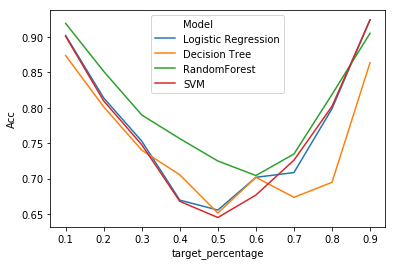

In [14]:
import seaborn as sns
sns.lineplot(x="target_percentage", y="Acc", hue="Model", data=ac_s)

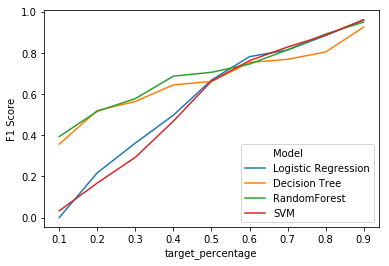

In [15]:
sns.lineplot(x="target_percentage", y="F1 Score", hue="Model", data=ac_s)

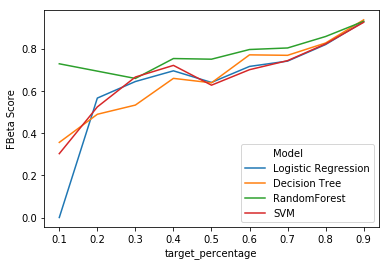

In [16]:
sns.lineplot(x="target_percentage", y="FBeta Score", hue="Model", data=ac_s)

Se puede observar en los resultados que en la gráfica del FBeta Score el modelo más estable (definido por el que tiene una pendiente menos empinada) es RandomForest, siendo este un modelo que con un target_percentage del 60% logra un acc de 70.4% (el minimo de la función de Acc y que junto con el Decision Tree logran tener un comportamiento muy similar solo que este último modelo en el FB Score reacciona mucho más fuerte ante cambios en los cortes del target_percentage. 

Adicionalmente, el omodelo Logistic Regression es un modelo que visto desde la gráfica de Acc tambien tiene un comportamiento convexo (pero RandomForest es mejor por el acc minimo que logra tener ) y su pendiente tanto en el F1 como en el FBeta es muy inclinada (lo que significa que reacciona muy fuerte ante cambios en los cortes del target_porcentage).

Por esto se concluye que el mejor modelo es RandomForest con un corte de balanceo del 60% obteniendo un Acc de 70.4% 

In [17]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)
print('Resampled dataset shape %s' % Counter(y_train))
for key, value  in models.items():
    value.fit(X_train, y_train.ravel())
    y_pred = value.predict(X_test)
    print()
    print(key,':')
    print('F1 Score: ', f1_score(y_pred, y_test))
    print('Accurancy: ', accuracy_score(y_pred, y_test))
    print('FBeta Score: ', fbeta_score(y_pred, y_test, beta=10))

Resampled dataset shape Counter({1: 560, 0: 555})

Logistic Regression :
F1 Score:  0.6363636363636365
Accurancy:  0.5824634655532359
FBeta Score:  0.5604528014712877

Decision Tree :
F1 Score:  0.6569037656903766
Accurancy:  0.6576200417536534
FBeta Score:  0.6515593540699347

RandomForest :
F1 Score:  0.6968325791855204
Accurancy:  0.7202505219206681
FBeta Score:  0.7500602787288421

SVM :
F1 Score:  0.6489361702127658
Accurancy:  0.5866388308977035
FBeta Score:  0.5611622187813097


# Exercise 15.3

Same analysis using random-over-sampling

In [18]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)
    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    return X[filter_], y[filter_]

In [19]:
ac_s=[]
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    X_train, y_train = OverSampling(X.values, y, target_percentage, 1)
    y_pred_new = pd.DataFrame (columns =models.keys(),index= y_test.index )
    for i, model  in models.items():
        model.fit(X_train, y_train)
        y_pred_new[i] = model.predict(X_test) 
    for model in models.keys():
        ac_s.append([model, target_percentage, accuracy_score(y_pred_new[model], y_test), f1_score(y_pred_new[model], y_test), fbeta_score(y_pred_new[model], y_test, beta=10)])
ac_s = pd.DataFrame(ac_s, columns=['Model', 'target_percentage', 'Acc', 'F1 Score', 'FBeta Score'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [20]:
ac_s

,Model,target_percentage,Acc,F1 Score,FBeta Score
0,Logistic Regression,0.1,0.993993,0.000000,0.000000
1,Decision Tree,0.1,0.999327,0.945946,0.898348
2,RandomForest,0.1,0.999327,0.945946,0.898348
3,SVM,0.1,0.993921,0.000000,0.000000
4,Logistic Regression,0.2,0.993320,0.000000,0.000000
5,Decision Tree,0.2,0.999327,0.945946,0.898348
6,RandomForest,0.2,0.999327,0.945946,0.898348
7,SVM,0.2,0.988394,0.051081,0.049278
8,Logistic Regression,0.3,0.947545,0.039595,0.022384
9,Decision Tree,0.3,0.999327,0.945946,0.898348


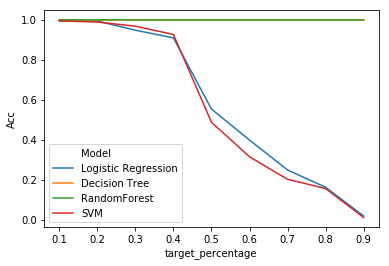

In [21]:
import seaborn as sns
sns.lineplot(x="target_percentage", y="Acc", hue="Model", data=ac_s)

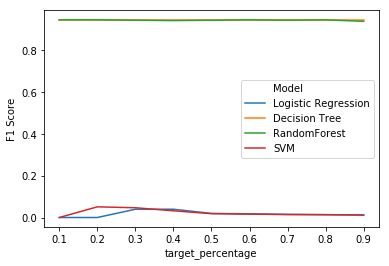

In [22]:
sns.lineplot(x="target_percentage", y="F1 Score", hue="Model", data=ac_s)

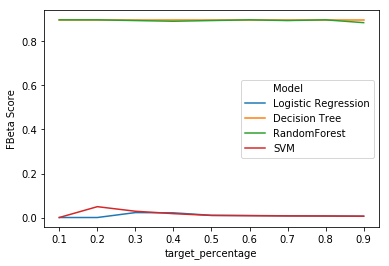

In [23]:
sns.lineplot(x="target_percentage", y="FBeta Score", hue="Model", data=ac_s)

In [24]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.30, random_state=42)
print('Resampled dataset shape %s' % Counter(y_train))
for key, value  in models.items():
    value.fit(X_train, y_train.ravel())
    y_pred = value.predict(X_test)
    print()
    print(key,':')
    print('F1 Score: ', f1_score(y_pred, y_test))
    print('Accurancy: ', accuracy_score(y_pred, y_test))
    print('FBeta Score: ', fbeta_score(y_pred, y_test, beta=10))

Resampled dataset shape Counter({0: 96840, 1: 96253})

Logistic Regression :
F1 Score:  0.6927667499047699
Accurancy:  0.6491329829013353
FBeta Score:  0.6208649125103209

Decision Tree :
F1 Score:  0.9966277623648714
Accurancy:  0.9965923509153526
FBeta Score:  0.9933443018609285

RandomForest :
F1 Score:  0.9992326691125338
Accurancy:  0.9992266328318531
FBeta Score:  0.9984816748834152

SVM :
F1 Score:  0.6899550748923133
Accurancy:  0.6355628058727569
FBeta Score:  0.6050223220063439


# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [25]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()  
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  
    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    return X, y

In [26]:
ac_s =[]
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_sm, y_sm = SMOTE(X.values, y, target_percentage, k, seed=3)
        X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42)
        for key, value  in models.items():
            value.fit(X_train, y_train)
            y_pred = value.predict(X_test) 
            ac_s.append([key, target_percentage, k, accuracy_score(y_pred, y_test), f1_score(y_pred, y_test), fbeta_score(y_pred, y_test, beta=10)])
ac_s = pd.DataFrame(ac_s, columns=['Model', 'target_percentage','k', 'Acc', 'F1 Score', 'FBeta Score'])

In [27]:
ac_s

,Model,target_percentage,k,Acc,F1 Score,FBeta Score
0,Logistic Regression,0.25,5,0.788617,0.467245,0.646018
1,Decision Tree,0.25,5,0.984067,0.968733,0.967283
2,RandomForest,0.25,5,0.992152,0.984388,0.996182
3,SVM,0.25,5,0.774588,0.380862,0.623975
4,Logistic Regression,0.25,15,0.749955,0.172018,0.523191
5,Decision Tree,0.25,15,0.980714,0.962003,0.964298
6,RandomForest,0.25,15,0.987874,0.975679,0.995654
7,SVM,0.25,15,0.743883,0.061379,0.402484
8,Logistic Regression,0.50,5,0.793076,0.789626,0.808554
9,Decision Tree,0.50,5,0.989100,0.989187,0.988281


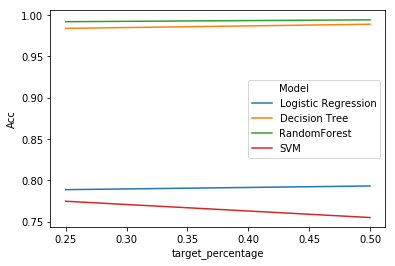

In [28]:
import seaborn as sns
sns.lineplot(x="target_percentage", y="Acc", hue="Model", data=ac_s[ac_s['k']==5])

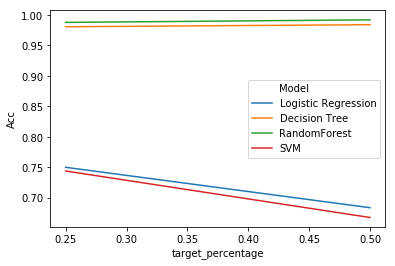

In [29]:
sns.lineplot(x="target_percentage", y="Acc", hue="Model", data=ac_s[ac_s['k']==15])

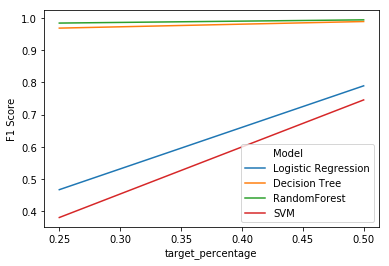

In [30]:
sns.lineplot(x="target_percentage", y="F1 Score", hue="Model", data=ac_s[ac_s['k']==5])

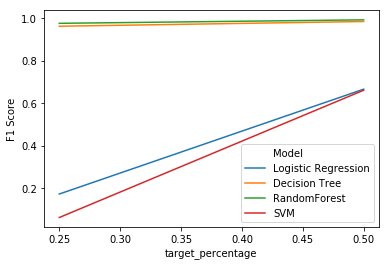

In [31]:
sns.lineplot(x="target_percentage", y="F1 Score", hue="Model", data=ac_s[ac_s['k']==15])

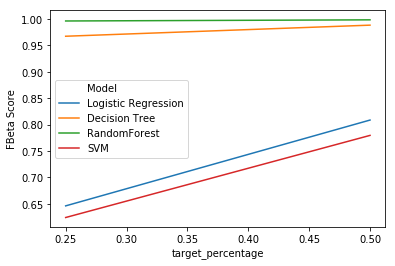

In [32]:
sns.lineplot(x="target_percentage", y="FBeta Score", hue="Model", data=ac_s[ac_s['k']==5])

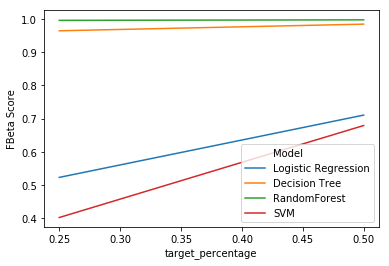

In [33]:
sns.lineplot(x="target_percentage", y="FBeta Score", hue="Model", data=ac_s[ac_s['k']==15])

Dado que con la función vista en clase los modelos RandomForest y Decision Tree no muestran cambios evaluables, se procede a utilizar la función SMOTE del paquete Imblearn.over_sampling para comparar

In [34]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42)
print('Resampled dataset shape %s' % Counter(y_train))
for key, value  in models.items():
    value.fit(X_train, y_train.ravel())
    y_pred = value.predict(X_test)
    print()
    print(key,':')
    print('F1 Score: ', f1_score(y_pred, y_test))
    print('Accurancy: ', accuracy_score(y_pred, y_test))
    print('FBeta Score: ', fbeta_score(y_pred, y_test, beta=10))

Resampled dataset shape Counter({0: 96840, 1: 96253})

Logistic Regression :
F1 Score:  0.6990925355118229
Accurancy:  0.6626185728958975
FBeta Score:  0.6356732582714605

Decision Tree :
F1 Score:  0.9898520337866171
Accurancy:  0.9897649688840553
FBeta Score:  0.9884242648370519

RandomForest :
F1 Score:  0.9959628971019368
Accurancy:  0.9959398223672286
FBeta Score:  0.9973018825355205

SVM :
F1 Score:  0.6931342655872148
Accurancy:  0.6473204036009909
FBeta Score:  0.6181632365444629


# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [35]:
from collections import Counter
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_ada, y_ada, test_size=0.30, random_state=42)
print('Resampled dataset shape %s' % Counter(y_train))
for key, value  in models.items():
    value.fit(X_train, y_train.ravel())
    y_pred = value.predict(X_test)
    print()
    print(key,':')
    print('F1 Score: ', f1_score(y_pred, y_test))
    print('Accurancy: ', accuracy_score(y_pred, y_test))
    print('FBeta Score: ', fbeta_score(y_pred, y_test, beta=10))

Resampled dataset shape Counter({0: 96811, 1: 96202})

Logistic Regression :
F1 Score:  0.6932659751706347
Accurancy:  0.6550210950061048
FBeta Score:  0.6282707354578471

Decision Tree :
F1 Score:  0.9889052810862029
Accurancy:  0.988817833440118
FBeta Score:  0.9870833084406563

RandomForest :
F1 Score:  0.9954879618823019
Accurancy:  0.9954666892324803
FBeta Score:  0.99672225630906

SVM :
F1 Score:  0.6951652354931043
Accurancy:  0.6459544734710654
FBeta Score:  0.6145416765968674


# Exercise 15.6 (3 points)

Compare and comment about the results

Utilizando UnderSampling se puede encontrar resultados interesantes en comparación a las demás formas de tratar el desbalanceo, aún y utilizando la libreria imblearn versus las funciones manuales vistas en clase, es evidente que los resultados no dan similares a la técnica mencionada al principio.

Sin embargo, asumiendo que las funciones en imblearn están haciendo bien la tarea de balancear las clases, se encuentra que la regresión logística tiende a tener unos resultados un poco más acordes a lo que uno esperaría ver (F1 scores y FBetas similares y mayores a .5) con un acc que se encuentra entre el .63 y el .68 en general. 

La conclusión que más tiene sentido para mi es la que se encuentra utilizando el método de UnderSampling en donde RandomForest logra tener buenos resultados en comparación a los otros modelos comparados. 